[*********************100%%**********************]  1 of 1 completed


Epoch 1/150
14/14 [==============================] - 4s 54ms/step - loss: 0.1736 - val_loss: 0.0238
Epoch 2/150
14/14 [==============================] - 0s 20ms/step - loss: 0.0257 - val_loss: 0.0771
Epoch 3/150
14/14 [==============================] - 0s 20ms/step - loss: 0.0153 - val_loss: 0.0072
Epoch 4/150
14/14 [==============================] - 0s 20ms/step - loss: 0.0078 - val_loss: 0.0047
Epoch 5/150
14/14 [==============================] - 0s 20ms/step - loss: 0.0066 - val_loss: 0.0049
Epoch 6/150
14/14 [==============================] - 0s 20ms/step - loss: 0.0066 - val_loss: 0.0043
Epoch 7/150
14/14 [==============================] - 0s 20ms/step - loss: 0.0062 - val_loss: 0.0059
Epoch 8/150
14/14 [==============================] - 0s 23ms/step - loss: 0.0059 - val_loss: 0.0044
Epoch 9/150
14/14 [==============================] - 0s 23ms/step - loss: 0.0056 - val_loss: 0.0035
Epoch 10/150
14/14 [==============================] - 0s 32ms/step - loss: 0.0055 - val_loss: 0.0034

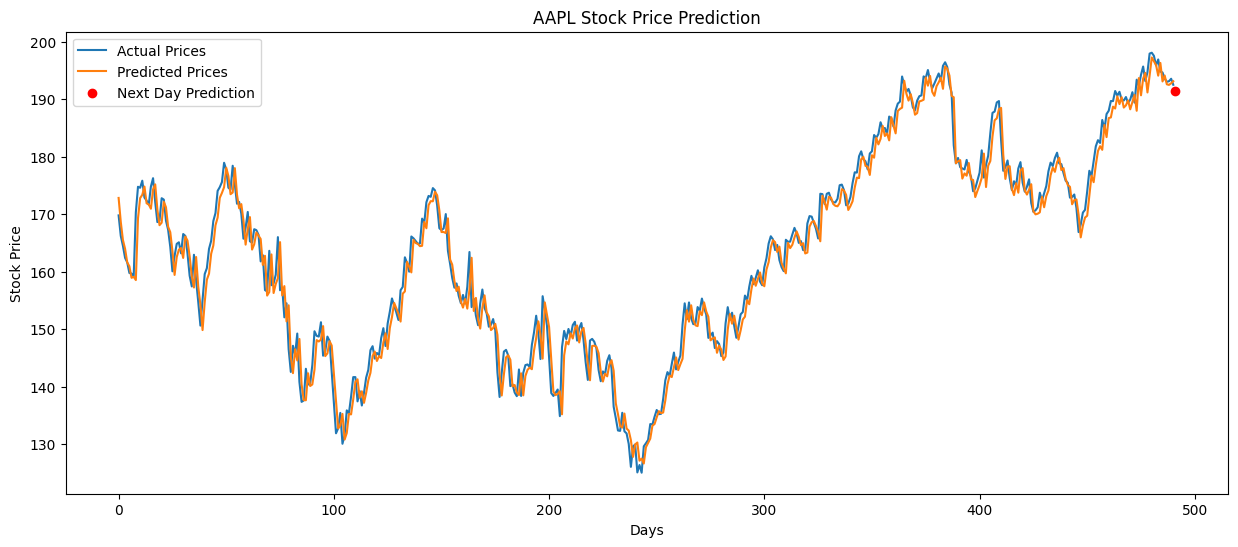

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

ticker_symbol = 'AAPL'#Use Different Ticker Symbols for different stocks,You can get this from the Webpage of Yahoo Finance
start_date = '2022-01-01'
end_date = '2024-01-01'

stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

target_column = 'Close'
stock_data[target_column] = stock_data[target_column].astype(float)

scaler = MinMaxScaler(feature_range=(0, 1))
stock_data_scaled = scaler.fit_transform(stock_data[target_column].values.reshape(-1, 1))

sequence_length = 10
sequences = []
target = []

for i in range(len(stock_data_scaled) - sequence_length):
    sequences.append(stock_data_scaled[i:i + sequence_length])
    target.append(stock_data_scaled[i + sequence_length])

sequences = np.array(sequences)
target = np.array(target)

model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

history = model.fit(sequences, target, epochs=150, batch_size=32, validation_split=0.1)

last_sequence = stock_data_scaled[-sequence_length:]
last_sequence = last_sequence.reshape((1, sequence_length, 1))
next_day_prediction = model.predict(last_sequence)
next_day_prediction = scaler.inverse_transform(next_day_prediction)

print(f'Predicted Stock Price for the Next Day: {next_day_prediction[0][0]}')

predicted_values = model.predict(sequences[-len(target):])
predicted_values = scaler.inverse_transform(predicted_values)
target = scaler.inverse_transform(target.reshape(-1, 1))

mse = mean_squared_error(target, predicted_values)
mae = mean_absolute_error(target, predicted_values)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

plt.figure(figsize=(15, 6))
plt.plot(target, label='Actual Prices')
plt.plot(predicted_values, label='Predicted Prices')
plt.scatter(len(target), next_day_prediction, color='red', marker='o', label='Next Day Prediction')
plt.title(f'{ticker_symbol} Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
